## Final Project Submission - Phase 2

Please fill out:
* Student name: __Marvin O. Agumba__
* Student pace: self paced / part time / full time: __Part Time__
* Scheduled project review date/time: __29th March 2023__
* Instructor name: __Samwel Jane__
* Blog post URL:


# Business Problem

Purpose of this project is to enlighten potential property buyers/sellers about the characteristics that influence pricing of homes in King County.

Data set to be used: __King County House Sales dataset__

This project strives to provide an ideal model to be used in predicting property prices, factoring in specific features to be considered that likewise determines the price.

At the end, we shall provide recommendations to assist you find value in your property to maximize returns.

# Data Understanding, Preparation & Exploration

__Importing Necessary Libraries__

In [1]:
#importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
#Loading Data
data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
#shape of dataset i.e no of rows & columns
data.shape

(21597, 21)

In [4]:
#checking for missing values in the dataset
print("Any missing value?", data.isna().values.any())

Any missing value? True


In [5]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We shall next deal with missing values in the 3 columns: 'waterfront', 'view' & 'yr_renovated'

In [6]:
#Checking number of unique contents in waterfront column
data['waterfront'].nunique

<bound method IndexOpsMixin.nunique of 0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    NaN
21596    0.0
Name: waterfront, Length: 21597, dtype: float64>

In [7]:
#Checking number of unique contents in yr_renovated column
data['yr_renovated'].nunique

<bound method IndexOpsMixin.nunique of 0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64>

In [8]:
#Checking number of unique contents in houses viewed column
data['view'].nunique

<bound method IndexOpsMixin.nunique of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: view, Length: 21597, dtype: float64>

In [9]:
#Based on Above findings, we shall proceed to replace all missing values with 0 (Common value)
data['waterfront'].fillna(0, inplace=True)
data['yr_renovated'].fillna(0, inplace=True)
data['view'].fillna(0, inplace=True)
# Dataset now contains no missing values

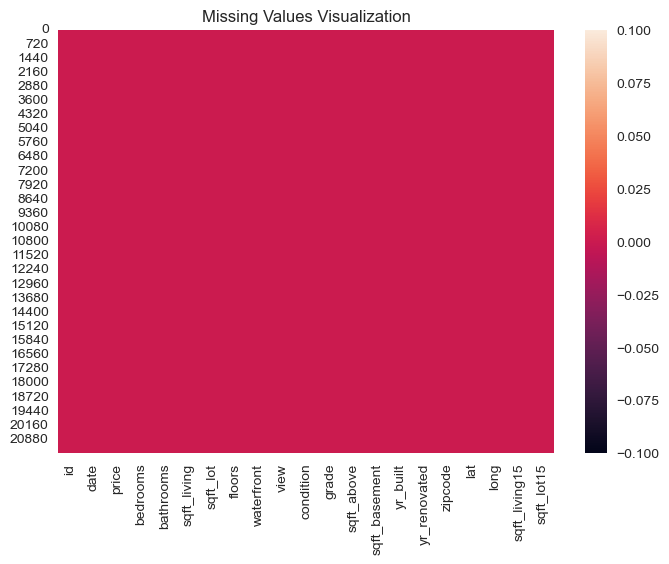

In [10]:
#visualizing missing values using heatmap
sns.heatmap(data.isna())
plt.title("Missing Values Visualization")
plt.show()
#Nill missing values in dataset

__Inspecting our data further inorder to get more insights of each of the columns. Function to return unique values for all the 21 columns provided in dataset__

In [11]:
for val in data:
    print(data[val].value_counts())
    print()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
11/2/2014      1
1/31/2015      1
5/24/2015      1
5/17/2014      1
7/27/2014      1
Name: date, Length: 372, dtype: int64

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      7

In [12]:
#Changing Datatypes & Replacing exsiting placeholder under 'sqft_basement' column with 0.0
data['sqft_basement'] = data['sqft_basement'].str.replace('?', '0.0', regex = True)

#changing data types
for col in ['waterfront','yr_renovated','view']:
    data[col]=data[col].apply(int)
data['sqft_basement']=data['sqft_basement'].apply(float).apply(int)

In [13]:
#dropping irrelevant columns
data=data.drop(['id','date','lat','long','sqft_living15','sqft_lot15','zipcode','yr_renovated','sqft_above','sqft_basement','view','zipcode'],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987


## Getting the overall statistics of the final dataset

In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0,322000.00,450000.00,645000.0,7700000.0
bedrooms,21597.0,3.373200,0.926299,1.0,3.00,3.00,4.0,33.0
bathrooms,21597.0,2.115826,0.768984,0.5,1.75,2.25,2.5,8.0
sqft_living,21597.0,2080.321850,918.106125,370.0,1430.00,1910.00,2550.0,13540.0
sqft_lot,21597.0,15099.408760,41412.636876,520.0,5040.00,7618.00,10685.0,1651359.0
floors,21597.0,1.494096,0.539683,1.0,1.00,1.50,2.0,3.5
waterfront,21597.0,0.006760,0.081944,0.0,0.00,0.00,0.0,1.0
condition,21597.0,3.409825,0.650546,1.0,3.00,3.00,4.0,5.0
grade,21597.0,7.657915,1.173200,3.0,7.00,7.00,8.0,13.0
yr_built,21597.0,1970.999676,29.375234,1900.0,1951.00,1975.00,1997.0,2015.0


__Data Visualization__

House Prices Distribution

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'House Prices Distribution')

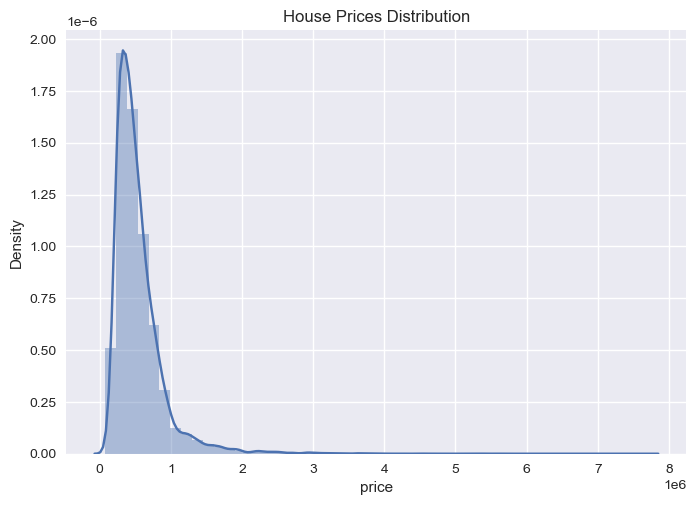

In [15]:
#King County House Price Distribution
sns.distplot(data['price'])
plt.title('House Prices Distribution')

Checking linearity assumptions for all selected predictor variables with target variable (Price) using scatter plots

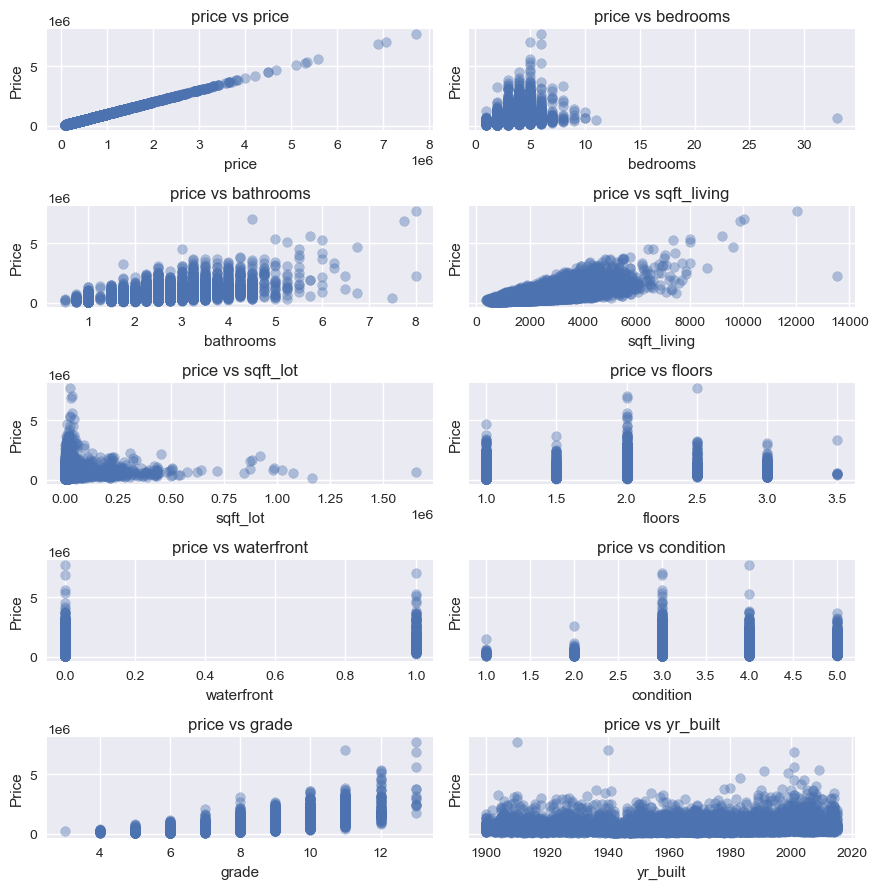

In [16]:
#Plotting subplots to visualize correlation between predictor & target variable
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(9,9), sharey=True )
for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'], label=column, alpha=.4)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
fig.tight_layout()

Linear relationship between price & the following variables:(sqft_lot & sqft_living)
Categorical variables: Grade, Condition, waterfront, floors

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No of Bedrooms vs Units Sold')

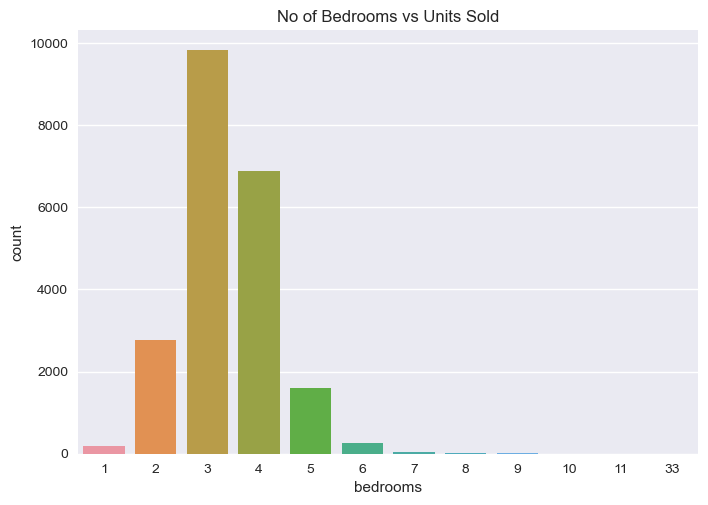

In [17]:
#Impact of No of bedrooms vs Units Sold
sns.countplot(data['bedrooms'])
plt.title('No of Bedrooms vs Units Sold')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Bathrooms Distribution')

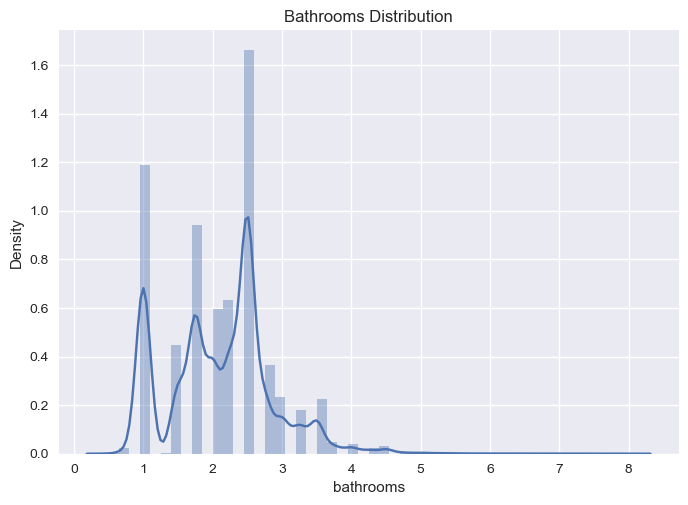

In [18]:
sns.distplot(data['bathrooms'])
plt.title('Bathrooms Distribution')

Text(0.5, 1.0, 'Sqft_lot vs Price')

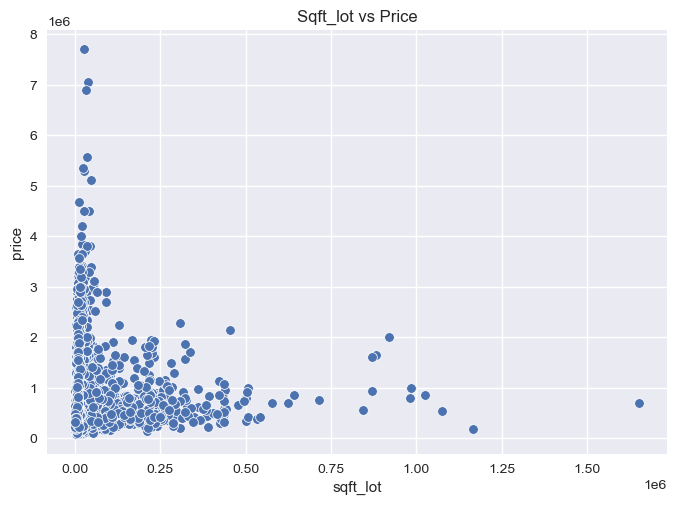

In [19]:
sns.scatterplot(x='sqft_lot',y='price',data=data)
plt.title('Sqft_lot vs Price')

Text(0.5, 1.0, 'Waterfront vs Price')

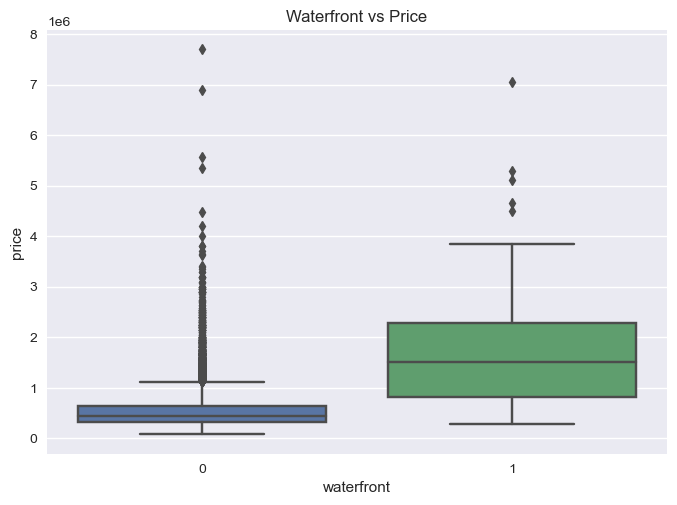

In [20]:
sns.boxplot(x='waterfront',y='price',data=data)
plt.title('Waterfront vs Price')

Text(0.5, 1.0, 'Sqft_living vs Price')

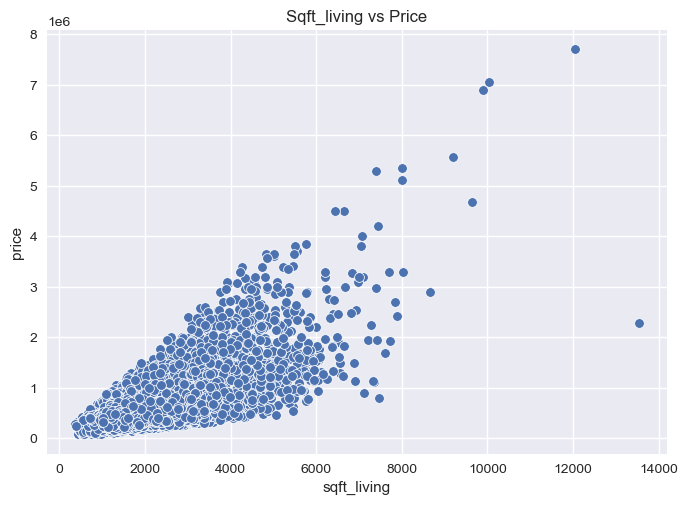

In [21]:
sns.scatterplot(x='sqft_living',y='price',data=data)
plt.title('Sqft_living vs Price')

In [22]:
#Correlation of the dataset
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.667951,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


House prices highly positively correlated with sqft_living & grade while low correlation with waterfront & floors. Likewise the no significant correlaltion between prices & condition & year built.

# Identifying Multicollinearity
Helps understand the correlation structure of the predictors

In [23]:
#dropping column containing target variable 'price'
data_one = data.iloc[:,1:10]
data_one.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,3,1.00,1180,5650,1.0,0,3,7,1955
1,3,2.25,2570,7242,2.0,0,3,7,1951
2,2,1.00,770,10000,1.0,0,3,6,1933
3,4,3.00,1960,5000,1.0,0,5,7,1965
4,3,2.00,1680,8080,1.0,0,3,8,1987


In [24]:
#checking correlation between predictor variables
data_one.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


In [25]:
#checking for highly correlated variables with correlations>0.75
abs(data_one.corr())>0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,True,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False
condition,False,False,False,False,False,False,True,False,False
grade,False,False,True,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,True


In [26]:
#function to return highly correlated pairs
df=data_one.corr().abs().stack().reset_index().sort_values(0,ascending =False)

df['pairs']= list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace=True)

df.drop(columns=['level_1', 'level_0'], inplace=True)

df.columns = ['cc']

df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(sqft_living, grade)",0.762779
"(grade, sqft_living)",0.762779
"(bathrooms, sqft_living)",0.755758
"(sqft_living, bathrooms)",0.755758


Text(0.5, 1.0, 'Predictor Variables Correlation Heatmap')

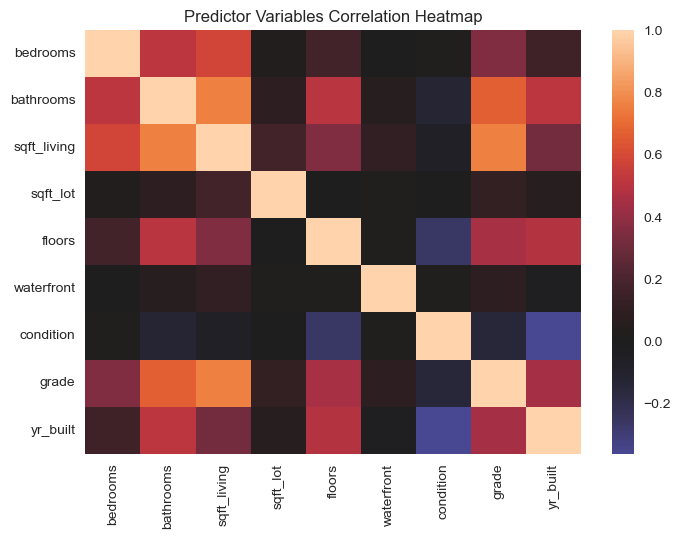

In [27]:
#heatmap visualizing correlation matrix
sns.heatmap(data_one.corr(), center=0)
plt.title('Predictor Variables Correlation Heatmap')

In [28]:
#Removing multicollinearity from our dataset
data = data.drop(['grade','bathrooms'],axis=1)
data.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built
0,221900.0,3,1180,5650,1.0,0,3,1955
1,538000.0,3,2570,7242,2.0,0,3,1951
2,180000.0,2,770,10000,1.0,0,3,1933
3,604000.0,4,1960,5000,1.0,0,5,1965
4,510000.0,3,1680,8080,1.0,0,3,1987


# Splitting Dataset to testing & training sets

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from statsmodels.formula.api import ols

X = data.drop(['price'], axis = 1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [35]:
# Create & Fit linear regressor model_1
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [36]:
# Modelling on the training set
y_pred = model_1.predict(X_train)

In [37]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.5842921927035927
Adjusted R^2: 0.5840995952682181
MAE: 157145.85203041477
MSE: 56516449076.04779
RMSE: 237731.88485360518


In [38]:
#Linear Regression Model_2
outcome='price'
x_cols=['bedrooms','sqft_living','sqft_lot','floors','waterfront','condition','yr_built']
predictors = '+'.join(x_cols)
formula = outcome +'~' + predictors
model_2 = ols(formula=formula, data=data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     4264.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:14:03   Log-Likelihood:            -2.9802e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21589   BIC:                         5.961e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.14e+06   1.33e+05     38.667      0.000    4.88e+06     5.4e+06
bedrooms    -5.605e+04   2164.439    -25.894      0.000   -6.03e+04   -5.18e+04
sqft_living   321.6569      2.376    135.362      0.000     316.999     326.315
sqft_lot       -0.3242      0.040     -8.108      0.000      -0.403      -0.246
floors       7.311e+04   3585.222     20.392      0.000    6.61e+04    8.01e+04
waterfront   7.739e+05      2e+04     38.739      0.000    7.35e+05    8.13e+05
condition    2.012e+04   2703.012      7.443      0.000    1.48e+04    2.54e+04
yr_built    -2667.5032     67.216    -39.686      0.000   -2799.251   -2535.756
==============================================================================
Omnibus:                    12999.928   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           426627.754
Skew:                           2.352   Prob(JB):                         0.00
Kurtosis:                      24.260   Cond. No.                     3.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Visualization Between Actual Prices & Predicted Values

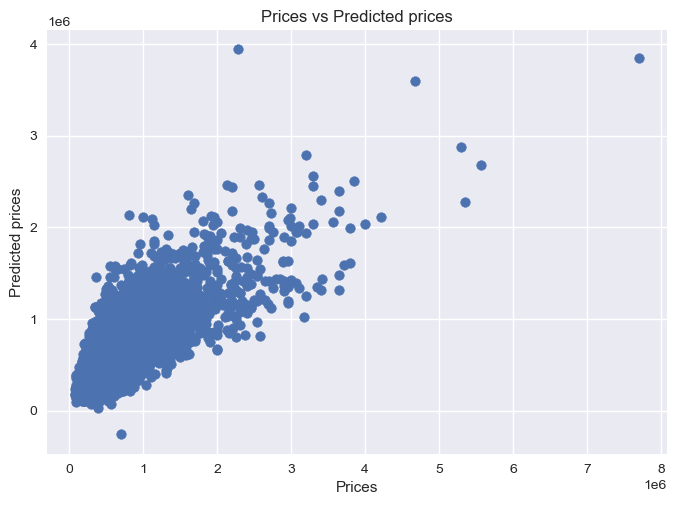

In [39]:
# visualizing difference between predicted & actual prices
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

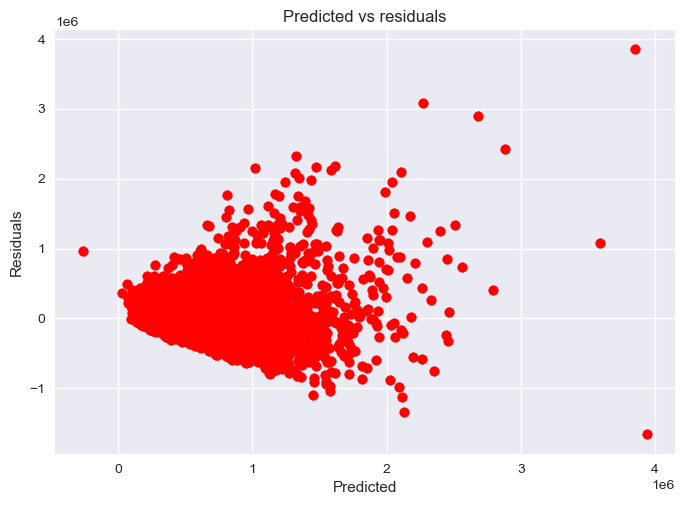

In [40]:
#Checking Residuals
plt.scatter(y_pred,y_train-y_pred, color='red')
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


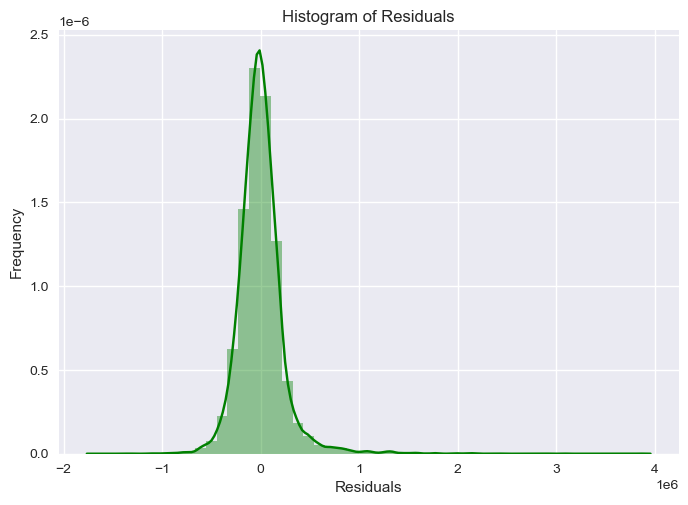

In [41]:
# Checking Normality of errors
sns.distplot(y_train-y_pred,color='green')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## RECOMENDATIONS & CONCLUSSION

Model settled upon because it follows the 3 linear regression assumptions (Linearity, Nomality & Homoscedasticity). Likeiwse it takes into consideration the key price predictors when wanting to either buy or sell property in King county. With the predictors & model predictions, we came to the final 2 conclussion:

1. For Home Buyers: Consider purchasing homes with high upgrade potential; houses with great views & don't panic buy because of the month as this is not significant in determining price. Likewise, consider looking for neighbors for an ideal house size.


2. For Home Sellers: Look for locations that sell well; consider increase assessed grade as this is a significant factor in determining home price; Consider renovating home by adding additional amenities like bathroom/bedrooms.